# Prática 1 — Librerías
### Importamos librerías
Primero importamos las librerías a utilizar: *numpy*, *pandas*, *matplotlib* y *skicit*.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

### Importación de dataset
Importamos el dataset a utilizar, en este caso la base de datos de **cáncer de mama de Wisconsin** proporcionado por *skicit*.
Mostramos algunos de los atributos del dataset, como pueden ser *radius*, *texture*, *perimeter*, *area* and *smoothness* junto al *target* (benigno o maligno).

In [3]:
breast_cancer = load_breast_cancer()
df = pd.DataFrame(data=breast_cancer.data, columns=breast_cancer.feature_names)

features = ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness']
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [4]:
df['target'] = breast_cancer.target
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [5]:
# Porcentajes de malignos y venignos
benign_percentage = round(df[df["target"] == 0].shape[0] / df.shape[0] * 100, 4)
malignant_percentage = round(df[df["target"] == 1].shape[0] / df.shape[0] * 100, 4)
print("Benign percentage: ", benign_percentage, "%")
print("Malignant_percentage: ", malignant_percentage, "%")


Benign percentage:  37.2583 %
Malignant_percentage:  62.7417 %


## Numpy

In [6]:
# Veamos qué columnas tiene nuestro dataset
print(breast_cancer.feature_names, "\n")

mean_radius = np.array(df["mean radius"])
print("Existen", mean_radius.shape[0], "muestras")

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

Existen 569 muestras


In [7]:
# Media, mediana, desviación típica
print("Media: ", np.mean(mean_radius))
print("Mediana: ", np.median(mean_radius))
print("Desviación típica", np.std(mean_radius))

Media:  14.127291739894552
Mediana:  13.37
Desviación típica 3.520950760711062


### Matplotlib

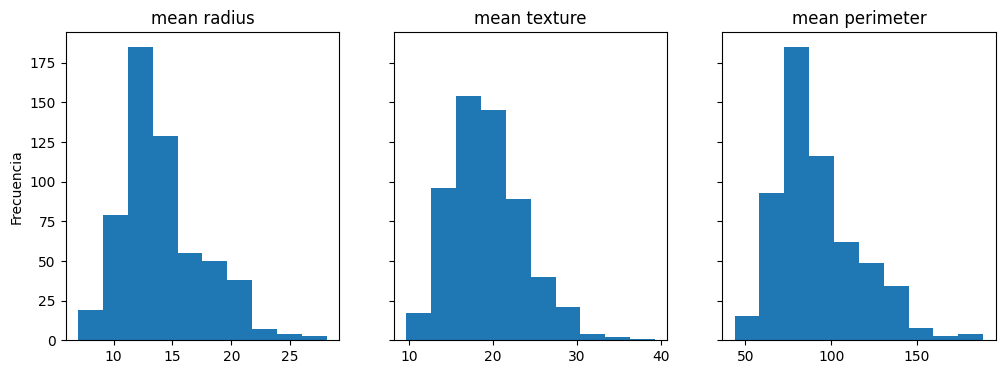

In [8]:
# Histograma de diferentes atributos 'mean radius', 'mean texture' y 'mean perimeter'
attr = ["mean radius", "mean texture", "mean perimeter"]

fig, axs = plt.subplots(1, 3, sharey=True, figsize=(12, 4))
axs[0].set_ylabel("Frecuencia")

for i, a in enumerate(attr):
    axs[i].hist(df[a], bins = 10)
    axs[i].set_title(a)
plt.show()

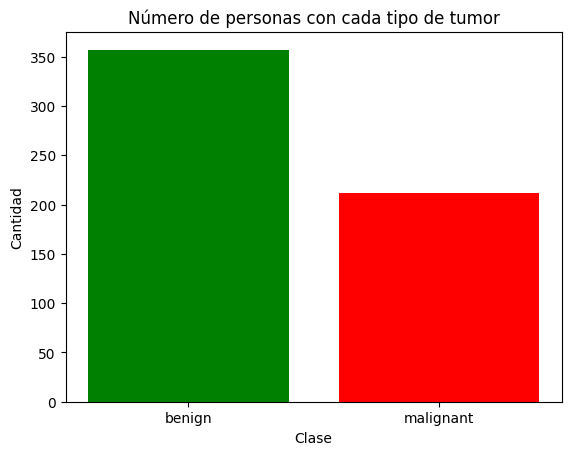

In [9]:
# Gráfico de barras de las clases
counts = df['target'].value_counts()
labels = [breast_cancer.target_names[i] for i in counts.index]

plt.bar(labels, counts, color=['green', 'red'])
plt.title('Número de personas con cada tipo de tumor')
plt.ylabel('Cantidad')
plt.xlabel('Clase')
plt.show()


Con el gráfico de barras de las clases, podemos hacernos una idea del balance del dataset. En este caso, vemos que es un dataset con más datos positivos que negativos, pero bastante balanceado. Esto nos puede servir para saber que tipo de métricas son más adecuadas en cuanto a la calificación de los modelos entrenados en base a este conjunto de datos.

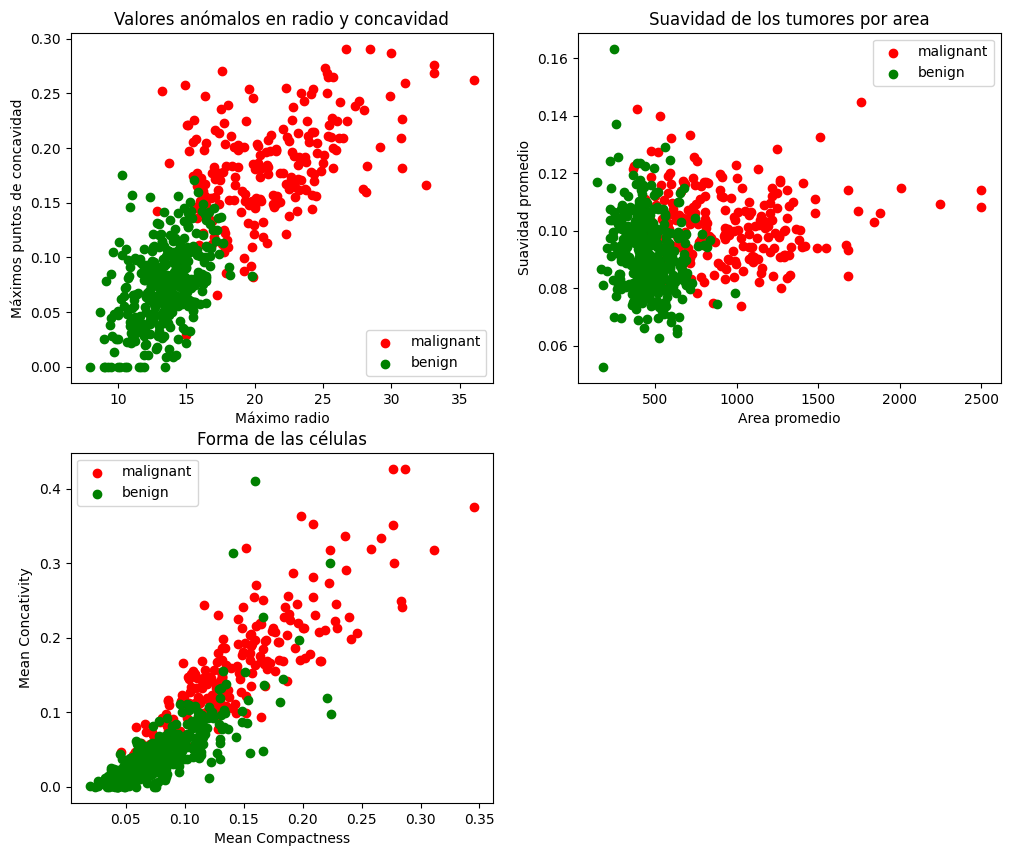

In [10]:
# Vamos a mostrar diferentes características del dataset en comparación unas con otras, para extraer conclusiones 
colors = ['red', 'green']

# Relación suavidad - textura

plt.figure(figsize=(12,10))
plt.subplot(2,2,1)
for i in range(2):
    plt.scatter(df[df['target'] == i]['worst radius'],
                df[df['target'] == i]['worst concave points'],
                label=breast_cancer.target_names[i], color=colors[i])
plt.xlabel('Máximo radio')
plt.ylabel('Máximos puntos de concavidad')
plt.title('Valores anómalos en radio y concavidad')
plt.legend()


# Relación area - suavidad
plt.subplot(2,2,2)
for i in range(2):
    plt.scatter(df[df['target'] == i]['mean area'],
                df[df['target'] == i]['mean smoothness'],
                label=breast_cancer.target_names[i], color=colors[i])

plt.xlabel('Area promedio')
plt.ylabel('Suavidad promedio')
plt.title('Suavidad de los tumores por area')
plt.legend()

# Relación compactness - concativity 
plt.subplot(2,2,3)
for i in range(2):
    plt.scatter(df[df['target'] == i]['mean compactness'],
                df[df['target'] == i]['mean concavity'],
                label=breast_cancer.target_names[i], color=colors[i])

plt.xlabel('Mean Compactness')
plt.ylabel('Mean Concativity')
plt.title('Forma de las células')
plt.legend()

plt.show()

De estas gráficas podemos extraer la siguiente información:
- Si los valores máximos de radio y concavidad detectados en un paciente, son altos, es muy probable que el tumor sea maligno
- Los tumores con mayor area, suelen ser malignos, mientras que la suavidad no influye tanto en la decisión
- Los tumores con una compacidad y concavidad media más alta, suelen ser malignos

Otra forma de analizar características de los datos es con el gráfico de líneas, con la que podemos comparar varias características a la vez.

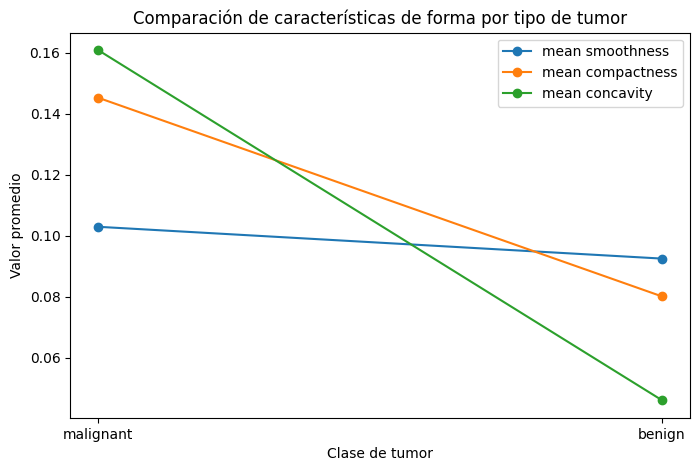

In [11]:
# Gráfico de líneas

# Seleccionamos características de escala similar
cols = ['mean smoothness', 'mean compactness', 'mean concavity']
grouped_means = df.groupby('target')[cols].mean()
labels = breast_cancer.target_names

plt.figure(figsize=(8, 5))
for col in cols:
    plt.plot(labels, grouped_means[col], marker='o', label=col)

plt.title('Comparación de características de forma por tipo de tumor')
plt.ylabel('Valor promedio')
plt.xlabel('Clase de tumor')
plt.legend()
plt.show()

Podemos observar las mismas conclusiones que con los gráficos de puntos, y es que los tumores malignos suelen presentar valores medios de compacidad y concavidad mucho más altos que los benignos, mientras que en cuanto a la suavidad, solo es ligeramente superior en los malignos.

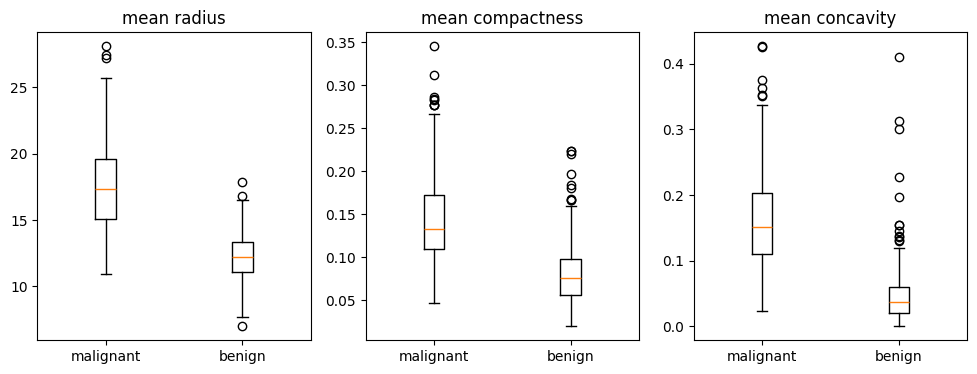

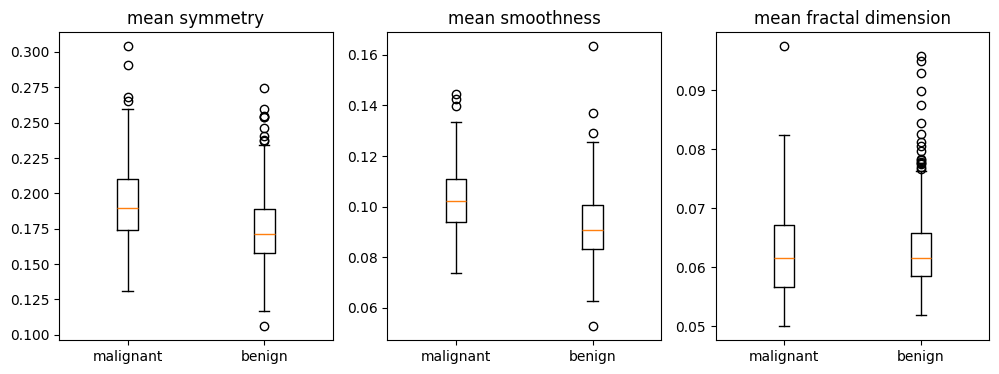

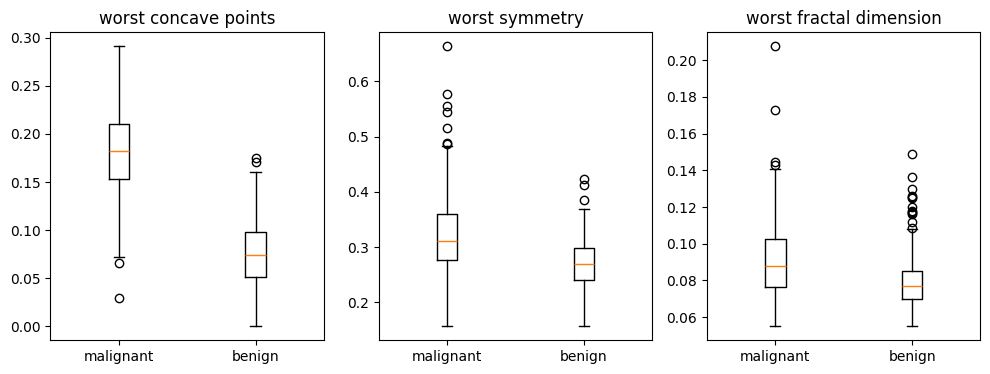

In [12]:
# Boxplots de mean radius, mean compactness, mean concavity

d = [df[df["target"] == i] for i in range(2)]

def box_plots(attr, data):
    fig, axs = plt.subplots(1, 3, figsize=(12, 4))
    for i, a in enumerate(attr):
        axs[i].set_title(a)
        axs[i].boxplot([data[0][a], data[1][a]], tick_labels=breast_cancer.target_names)

    plt.show()

attr = ["mean radius", "mean compactness", "mean concavity"] #"mean symmetry", "mean smoothness"]
box_plots(attr, d)

attr = ["mean symmetry", "mean smoothness", "mean fractal dimension"]
box_plots(attr, d)

attr = ['worst concave points', 'worst symmetry', 'worst fractal dimension']
box_plots(attr, d)



Se observa que la **compacidad promedio** influye mucho en el diagnóstico. Mientras más bajo sea el valor más probable es que sea promedio